In [1]:
import numpy as np
import sklearn 
from sklearn.neighbors import KDTree
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
import pandas as pd
from sklearn.externals import joblib

In [2]:
# Define NN size 
NN = 100

## Load in all data

After calculating the overall accuracy, I will not work with the training dataset anymore, but only test it on the testing dataset. 

In [3]:
# Uploadng my datasets
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA/ML_datasets/Initial_setup"
META_FILE_PATH = "../DATA/META"
IMAGE_FILE_PATH = r"images"

# Testing data
# We do not have to sownsample the testing data
y_test = np.loadtxt(FILE_PATH+'/y_test_'+ str(NN) +'NN.txt', delimiter=',')
X_test = np.loadtxt(FILE_PATH+'/X_test_'+ str(NN) +'NN.txt', delimiter=',')

In [4]:
# For RF classifier: cast as float32 
y_test = y_test.astype('float32')
X_test = X_test.astype('float32')

In [5]:
y_train = np.loadtxt(FILE_PATH+'/y_train_'+ str(NN) +'NN.txt', delimiter=',')

In [6]:
###uploading the saved classifier
filename = '/randomforest_model_'+ str(NN) +'NN.sav'
clf = joblib.load(FILE_PATH + filename)

In [7]:
# Load the predictions
predictions_train = np.loadtxt(FILE_PATH+'/predictions_train_'+ str(NN) +'NN.txt', delimiter=',')
predictions_test = np.loadtxt(FILE_PATH+'/predictions_test_'+ str(NN) +'NN.txt', delimiter=',')

In [8]:
clf.score(X_test,y_test)

0.9148059294472325

In [10]:
import pylab as plt
import pandas as pd
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
target_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']

Normalized confusion matrix


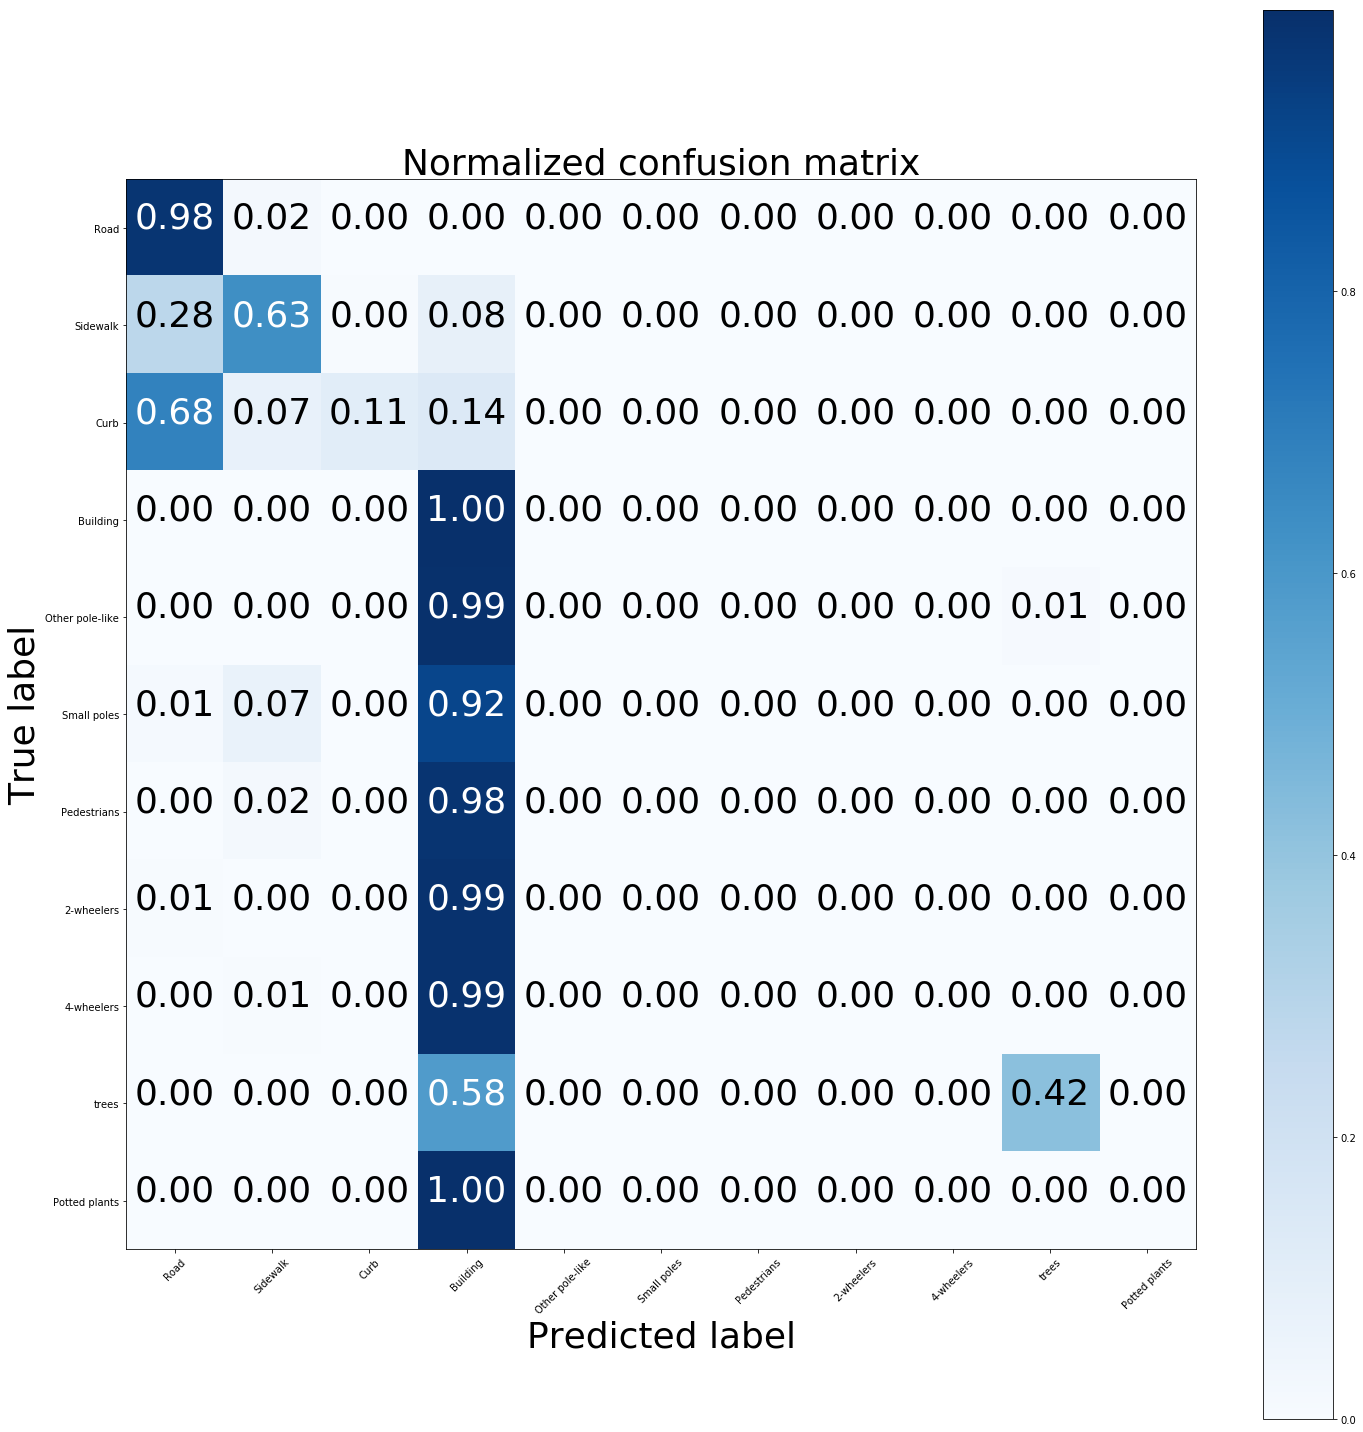

In [12]:
# Create the confusion matrix
class_names = target_names
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=36)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=36,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=36)
    plt.xlabel('Predicted label',fontsize=36)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(20,20))
#plot_confusion_matrix(cnf_matrix, classes=class_names,
                      #title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(FILE_PATH+"/ConfusionMatrixScenarioA1")

plt.show()

## Now start evaluation 

### Show problem with threshold or unclassified

I thought I could determine a threshold or a difference between two values to create a class unclassified. But this will not work. Especially the predictions for the noisy and small classes are really bad. They are never the highest in the probability array. Mostly, they get classified as building. Even if I set a threshold, the classsifier is still sure that it must be a building. Also, there is a biggap to the next highest value. 

In [ ]:
# Calculate all probabilities for the testing set 
probability_array = clf.predict_proba(X_test)
print "This is the shape of the array", probability_array.shape

In [65]:
probability_array.sort()
print "Max", (probability_array[0][-1])*100, "%"
print "sec Max", (probability_array[0][-2])*100, "%"
print "Difference between highest and second highest value", (probability_array[0][-1])*100 - (probability_array[0][-2])*100, "%"

Max 90.59667185706162 %
sec Max 4.1939604148964955 %
Difference between highest and second highest value 86.40271144216513 %


In [68]:
# Number of instances per class in testing set  
np.histogram(y_test)

(array([ 646126,  176841,   11971, 1271960,     768,    3605,    4614,
           7960,   63779,   22835]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]))

In [40]:
# Look where the value should be class 11 (potted plant)
np.where(y_test == 11)

In [69]:
# For these values, check the probability 
probability_array[2209993]

array([6.27756543e-04, 3.30485854e-03, 4.92809204e-03, 4.95491760e-03,
       9.05750052e-03, 9.53493209e-03, 1.51425102e-02, 1.85366707e-02,
       2.27663613e-02, 1.23530836e-01, 7.87615564e-01])

In [80]:
for i in range(0,11):
    print "Max. value for class " +str(i+1)+ ":", probability_array[:,i].max()*100, "%"


Max. value for class 1: 0.3699568958628669 %
Max. value for class 2: 0.6751852446548976 %
Max. value for class 3: 1.0076837122626885 %
Max. value for class 4: 1.7199943004976337 %
Max. value for class 5: 2.051003130842827 %
Max. value for class 6: 5.377239347152576 %
Max. value for class 7: 11.36167740470613 %
Max. value for class 8: 22.72579506396993 %
Max. value for class 9: 31.249614158660265 %
Max. value for class 10: 49.00685656977799 %
Max. value for class 11: 96.53842574048637 %


In [84]:
probability_array[:,0].shape

(2210459,)

In [9]:
clf.score(X_test, y_test)

0.9171416434324274

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [46]:
# for testing
f1 = f1_score(y_test, predictions_test, average="weighted")
rec = recall_score(y_test, predictions_test, average="weighted")
prec = precision_score(y_test, predictions_test, average="weighted")

In [37]:
# for training
f1_train = f1_score(y_train, predictions_train, average="macro")
rec_train = recall_score(y_train, predictions_train, average="macro")
prec_train = precision_score(y_train, predictions_train, average="macro")


In [47]:
print "F1", f1
print "recall", rec
print "precission", prec

F1 0.893543640791804
recall 0.9171416434324274
precission 0.8949788778688254


In [39]:
print "F1", f1_train
print "recall", rec_train
print "precission", prec_train

F1 0.2532961984983418
recall 0.2510855137093803
precission 0.32834623914232464


In [19]:
from sklearn.metrics import classification_report

In [34]:
# Create the evaluation file
target_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']

classification_report(y_test, predictions_test, target_names=target_names)

u'                 precision    recall  f1-score   support\n\n           Road       0.93      0.97      0.95    646126\n       Sidewalk       0.83      0.75      0.79    176841\n           Curb       0.00      0.00      0.00     11971\n       Building       0.92      1.00      0.96   1271960\nOther pole-like       0.00      0.00      0.00       768\n    Small poles       0.00      0.00      0.00      3605\n    Pedestrians       0.00      0.00      0.00      4614\n     2-wheelers       0.00      0.00      0.00      7960\n     4-wheelers       0.93      0.05      0.09     63779\n          trees       0.00      0.00      0.00     21041\n  Potted plants       0.00      0.00      0.00      1794\n\n    avg / total       0.89      0.92      0.89   2210459\n'

In [33]:
clf_report_B

u'                 precision    recall  f1-score   support\n\n           Road       0.93      0.97      0.95    646126\n       Sidewalk       0.83      0.75      0.79    176841\n           Curb       0.00      0.00      0.00     11971\n       Building       0.92      1.00      0.96   1271960\nOther pole-like       0.00      0.00      0.00       768\n    Small poles       0.00      0.00      0.00      3605\n    Pedestrians       0.00      0.00      0.00      4614\n     2-wheelers       0.00      0.00      0.00      7960\n     4-wheelers       0.93      0.05      0.09     63779\n          trees       0.00      0.00      0.00     21041\n  Potted plants       0.00      0.00      0.00      1794\n\n    avg / total       0.89      0.92      0.89   2210459\n'

In [40]:
from sklearn.metrics import confusion_matrix

In [52]:
conf_matrix  = confusion_matrix(y_test, predictions_test)

np.savetxt(FILE_PATH + "/confusionMatrix_scenarioA1.txt", conf_matrix, delimiter=',')

numpy.ndarray

In [48]:
# Create the evaluation file
target_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']

clf_report_A1 = classification_report(y_test, predictions_test, target_names=target_names)
clf_report_A1 = clf_report_A1.encode('ascii','ignore')
print clf_report_A1

# Save it in new text file
file = open(FILE_PATH + "/clf_report_scenarioA1.txt", "w")
file.write(clf_report_A1)
file.close()

                 precision    recall  f1-score   support

           Road       0.93      0.97      0.95    646126
       Sidewalk       0.83      0.75      0.79    176841
           Curb       0.00      0.00      0.00     11971
       Building       0.92      1.00      0.96   1271960
Other pole-like       0.00      0.00      0.00       768
    Small poles       0.00      0.00      0.00      3605
    Pedestrians       0.00      0.00      0.00      4614
     2-wheelers       0.00      0.00      0.00      7960
     4-wheelers       0.93      0.05      0.09     63779
          trees       0.00      0.00      0.00     21041
  Potted plants       0.00      0.00      0.00      1794

    avg / total       0.89      0.92      0.89   2210459



In [53]:
print FILE_PATH

../DATA/ML_datasets/Initial_setup
